In [1]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import numpy as np
# font_path = "C:/WINDOWS/FONTS/TIMES.TTF"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family=font_name)

In [2]:
rcparams = {"font.family":"serif", "mathtext.fontset":"stix"}
plt.rcParams.update(rcparams)
plt.rcParams["font.serif"] = ["Time New Roman"] + plt.rcParams["font.serif"]

mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=10)

F_packet = 80
Num_packet = 4
di = 400000

In [3]:
SC_pdf = np.load("/content/drive/My Drive/Colab Notebooks/result/pdf/SC_pdf.npy")
SD_pdf = np.load("/content/drive/My Drive/Colab Notebooks/result/pdf/SD_pdf.npy")
FCN_pdf = np.load("/content/drive/My Drive/Colab Notebooks/result/pdf/FCN_pdf.npy")
CNN_pdf = np.load("/content/drive/My Drive/Colab Notebooks/result/pdf/CNN_pdf.npy")

In [4]:
def stack_fun(s1, s2, s3):
    two_bottom = np.add(s1, s2)
    three_bottom = np.add(two_bottom, s3)

    return two_bottom, three_bottom

In [5]:
SC_1, SC_2 = stack_fun(SC_pdf[0], SC_pdf[1], SC_pdf[2])
SD_1, SD_2 = stack_fun(SD_pdf[0], SD_pdf[1], SD_pdf[2])
FCN_1, FCN_2 = stack_fun(FCN_pdf[0], FCN_pdf[1], FCN_pdf[2])
CNN_1, CNN_2 = stack_fun(CNN_pdf[0], CNN_pdf[1], CNN_pdf[2])

In [6]:
def sub_graph(idx, state_1, state_2, state_3, state_4, two_bottom, three_bottom):

    plt.subplot(4, 1, idx)
    p1 = plt.bar(x, state_1, color='b', hatch='//', linewidth=0, edgecolor='k')
    # plt.bar(x, state_1, color='none', edgecolor='b')
    plt.xticks(x_1, x_2)
    p2 = plt.bar(x, state_2, color='r', hatch='\\\\', linewidth=0, edgecolor='k', bottom=state_1)
    # plt.bar(x, state_2, color='none', edgecolor='r', bottom=state_1)
    plt.xticks(x_1, x_2)
    p3 = plt.bar(x, state_3, color='g', hatch='++', linewidth=0, edgecolor='k', bottom=two_bottom)
    # plt.bar(x, state_3, color='none', edgecolor='g', bottom=two_bottom)
    plt.xticks(x_1, x_2)
    p4 = plt.bar(x, state_4, color='magenta', hatch='xx',  linewidth=0, edgecolor='k', bottom=three_bottom)
    # plt.bar(x, state_4, color='none', edgecolor='magenta', bottom=three_bottom)
    plt.xticks(x_1, x_2)

    plt.tick_params(labelsize=10)

    plt.legend((p4[0], p3[0], p2[0], p1[0]), ("Small-cell BS4", "Small-cell BS3", "Small-cell BS2", "Small-cell BS1"), fontsize=13)

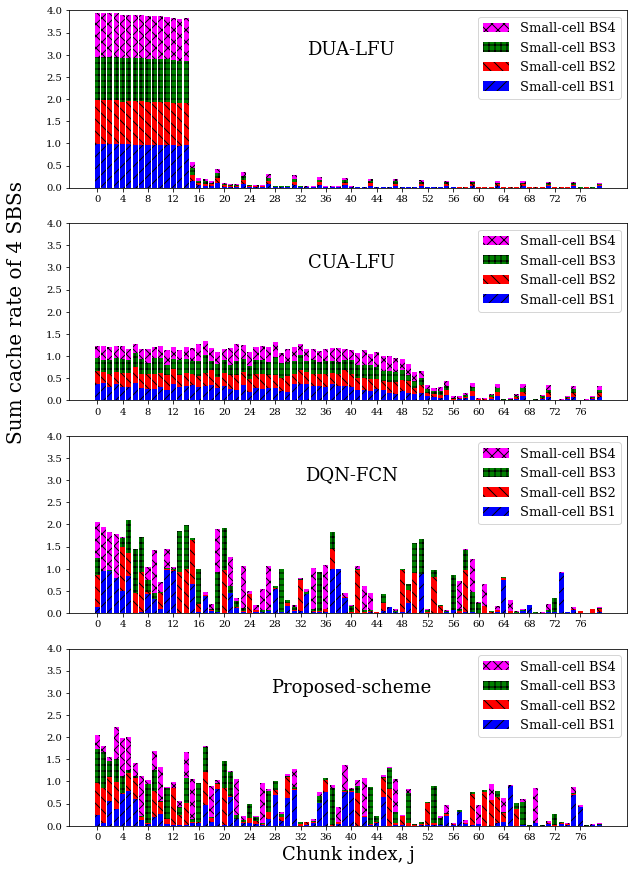

In [7]:
x = range(0, 80)
x_1 = range(0, 80, 4)
x_2 = ["{:0^d}".format(x) for x in range(0, 80, 4)]
plt.figure(figsize=(10,15))

sub_graph(1, SD_pdf[0], SD_pdf[1], SD_pdf[2], SD_pdf[3], SD_1, SD_2)
plt.text(40, 3, 'DUA-LFU', fontsize=18, horizontalalignment='center')
plt.ylim(0, 4.0)

sub_graph(2, SC_pdf[0], SC_pdf[1], SC_pdf[2], SC_pdf[3], SC_1, SC_2)
plt.text(40, 3, 'CUA-LFU', fontsize=18, horizontalalignment='center')
plt.ylim(0, 4.0)
plt.ylabel("Sum cache rate of 4 SBSs", fontsize=20, labelpad=20)

sub_graph(3, FCN_pdf[0], FCN_pdf[1], FCN_pdf[2], FCN_pdf[3], FCN_1, FCN_2)
plt.text(40, 3, 'DQN-FCN', fontsize=18, horizontalalignment='center')
plt.ylim(0, 4.0)

sub_graph(4, CNN_pdf[0], CNN_pdf[1], CNN_pdf[2], CNN_pdf[3], CNN_1, CNN_2)
plt.text(40, 3, 'Proposed-scheme', fontsize=18, horizontalalignment='center')
plt.xlabel("Chunk index, j", fontsize=18)
plt.ylim(0, 4.0)

plt.show()